In [2]:
list(range(1))

[0]

In [3]:
min(-0.5,0)

-0.5

In [4]:
def adj_infantry(dictt):
    strong_inf_2_make = min(dictt["artillery"], dictt["infantry"])
    print(dictt)
    print(strong_inf_2_make )
    if strong_inf_2_make > 0:
        dictt["infantry"] -= strong_inf_2_make
        dictt = Merge(dictt, {"strong_infantry" :  strong_inf_2_make})
    
    print(dictt)
    
adj_infantry(egypt)

NameError: name 'egypt' is not defined

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

unit_cost = {"infantry" : 3, "strong_infantry" : 3.5,  "artillery" : 4, "tank" : 5, "fighter" : 10, 
                  "bomber" : 12, "aaa" : 5,
             "cruiser" : 12, "carrier" : 14, "sub" : 6, "destroyer" : 8,
            "transport" : 7, "battleship" : 20}
land_unit_offense = {"tank" : 3, "infantry" : 1, "strong_infantry" : 2,
                  "bomber" : 4, "fighter" : 3, 
                  "aaa" : 0, "artillery" : 2}
land_unit_defense = {"tank" : 3, "infantry" : 2, 
                  "bomber" : 1, "fighter" : 4, 
                  "aaa" : 0, "artillery" : 2}

sea_unit_offense = {"carrier" : 1, "cruiser" : 3, "sub" : 2, "destroyer" : 2,
                   "battleship" : 4, "fighter": 3, "bomber" : 4}
### need to adjust for sub.
sea_unit_defense = {"carrier" : 2, "cruiser" : 3, "sub" : 1, "destroyer" : 2,
                   "battleship" : 4, "fighter": 4}



#attack_on_caucuses
my_units = {"infantry" : 9, "artillery": 2, "tank" : 3, "fighter" : 3, "bomber" : 1,  }
his_units = {"infantry" : 8, "fighter" : 1, "aaa" : 1}


def zero_units_check(dictt):
    summ = 0
    for i in dictt.values():
        summ += i
    return(summ <= 0)

def roll_die(unit, n, offDef, artillary_presence = 0, silent = True, method = "land"):
    assert offDef in ["offense" , "defense"], "You must choose either offense or defense"
    
    if method == "land":
        dict_set = {"offense" : land_unit_offense, "defense": land_unit_defense}
    else:
        dict_set = {"offense" : sea_unit_offense, "defense": sea_unit_defense}
    
    assert(method in ["land", "sea"])
    
    if offDef == "offense":
        dictt = dict_set["offense"]
    else:
        dictt = dict_set["defense"]
        
    
    strength = dictt[unit]
    if offDef == "offense":
        if unit == "infantry":
            if artillary_presence > 0:
                if silent == False:
                    print("loss")
                strength = 2
                

    if silent != True:
        print("strength " + str(strength))
    
    if unit == "battleship":
        if type(n) == float:
            roll = list(np.random.choice(6, int(n*2) + 1))
        else: 
            roll = list(np.random.choice(6, n) + 1)
    else:
        roll = list(np.random.choice(6, n) + 1)
    
    
    total_hits = sum(pd.Series(roll) <= strength)
    
    if (total_hits > 0):
        if silent != True:
            print(unit + " " + str(total_hits) + " hits")
    
    return(total_hits)
    
def delete_zeros(dic):   
    return {x:y for x,y in dic.items() if y!=0}
    
def attack(atk_units, defend_units, method = "land",
           silent = True, victory = False, first_round = False):
    if silent != True:
        print("\n")
        print("ATTACK!")
        
    
    
    
    if method == "land":
        if first_round == True:
            """
            if "battleship" in list(atk_units.keys()):
                die_rolls = np.random.choice(6, atk_units["battleship"]) < 4
                if die_rolls:
                    defend_units = delete_cheapest_unit(defend_units)
                print
            if "cruiser" in list(atk_units.keys()):
                die_rolls = np.random.choice(6, atk_units["battleship"]) < 3
                if die_rolls:
                    defend_units = delete_cheapest_unit(defend_units)
                    
            """
                
            if "fighter" in list(atk_units.keys()):
                air_units_killed = 0
                #aaa stuff goes here

                if "aaa" in list(defend_units.keys()):
                    air_units_killed = 0
                    for i in range(defend_units["aaa"]):
                        #print("firing aaa")
                        die_rolls = np.random.choice(6, atk_units["fighter"]) < 1
                        air_units_killed += sum(die_rolls)

                atk_units["fighter"] -= min(air_units_killed, 0)
                
                if air_units_killed != 0:
                    if silent != True:
                        print(str(air_units_killed) + " fighters_destroyed")

        #atk_units = delete_zeros(atk_units)

        

    #artil = "artillery" in list(atk_units.keys())
    #if artil:
    #    atk_units[artil]
        
    atk_hits = 0
    for unit, troops in atk_units.items():
        if unit == "battleship":
            if type(troops) == float:
                atk_hits += roll_die(unit = unit, n = int(troops*2), method = method,
                                 offDef = "offense", artillary_presence = False)
        else:      
            atk_hits += roll_die(unit = unit, n = troops, method = method,
                                 offDef = "offense", artillary_presence = False)
        
    
    dfnd_hits = 0
    for unit, troops in defend_units.items():
        dfnd_hits += roll_die(unit = unit, n = troops, offDef = "defense", method = method)
    
    ### now calculate new dicts
    for i in range(atk_hits):
        if zero_units_check(defend_units) == False:
            defend_units = delete_cheapest_unit(defend_units)
    
        
    for j in range(dfnd_hits):
        if zero_units_check(atk_units) == False:
            atk_units = delete_cheapest_unit(atk_units)
        
    battle = None
    if zero_units_check(atk_units):
        battle = "loss"

    if zero_units_check(defend_units):
        battle = "victory"
        
    if silent != True:
        print("Attacker: " + str(atk_hits ) + " total hits")
        print(atk_units)
        print("Defender: " + str(dfnd_hits) + " total hits")
        print(defend_units)
    return({"atk" : atk_units, 
            "defend" :  defend_units, 
            "battle_result" : battle})
def Merge(dict1, dict2): 
    res = {**dict1, **dict2} 
    return res 

def delete_cheapest_unit(curr_units_, silent = True):
    if silent != True:
        print("curr_units: " + str(curr_units_))
    if zero_units_check(curr_units_) :
        return curr_units_
    
    curr_units = curr_units_.copy().copy()
    unit_cost_ = {}
    
    current_battle_units = curr_units.keys()
    
    dead_units  = {}
    alive_units = curr_units.copy()
    
    for unit, troops in curr_units.items():
        if troops == 0:
            # remove dead units
            dead_units = Merge(dead_units, {unit : 0 })
            alive_units.pop(unit)
    alive_units_lst = list(alive_units.keys())
    if silent != True:
        print("alive units " + str(alive_units))
        print("dead units " + str(dead_units))
        print("unit_cost " + str(unit_cost_))
    for unit, troops in alive_units.items():
        if unit not in list(dead_units.keys()):
            unit_cost_ = Merge(unit_cost_, {unit : unit_cost[unit]})
    
    unit_2_del_idx = (np.argmin(list(unit_cost_.values())))
    unit_2_del = alive_units_lst[unit_2_del_idx]
    if unit_2_del == "battleship":
        alive_units[unit_2_del] -= 0.5
    else:
        alive_units[unit_2_del] -= 1
    #curr_units = delete_zeros(curr_units)
    
    all_units = Merge(alive_units, dead_units)
    return(all_units)

def big_picture(attacking_units, defending_units, nIter = 1000, silent = True, method = "land"):
    
    
    
    #impliment avg. units remaining
    """
    for i in range(10):
    if i == 0:
        df = pd.DataFrame([A,B])
        display(df)
    else:
        df_ = pd.DataFrame(A, index = [0])
        df = pd.concat([df, df_])
    answer = dict(round(df.mean(), 3))
    print(answer)
    display(df)
    """
    #initialize counters
    Wins, Losses = 0, 0
    count_iter = 0

    print("starting attacking units: " + str(attacking_units))
    print("starting defending units: " + str(defending_units))

    for j in range(nIter):
        if silent != True:
            print("\n battle: " + str(j))
        count_iter += 1
        # perspective is from attacker
        atk, defend = attacking_units.copy(), defending_units.copy()
        if silent != True:
                print("starting attacking units: " + str(atk))
                print("starting defending units: " + str(defend))
                
        for i in range(20):
            
            #Winner = None
            if i == 0:
                res = attack(atk, defend, method = method, 
                             silent = silent, first_round = True)
            res = attack(atk, defend, method = method, 
                             silent = silent, first_round = False)
                
            
            #result of battle
            atk, defend = res["atk"], res["defend"]
            battle_result = res["battle_result"]
                    
            if silent != True:
                print("round: " + str(i))
                print("remaining attacking units: " + str(atk))
                print("remaining defending units: " + str(defend))
                print("battle result: " + str(battle_result))
                
            #return both win and loss units, find their average.
            if battle_result != None:
                if j == 0:
                    df_atk    = pd.DataFrame(atk, index = [0])
                    df_defend = pd.DataFrame(defend, index = [0])
                else:
                    # this battles result -> df
                    df_atk_row = pd.DataFrame(atk, index = [0])
                    df_defend_row = pd.DataFrame(defend, index = [0])
                    #concat them:
                    df_atk = pd.concat([df_atk, df_atk_row])
                    df_defend = pd.concat([df_defend, df_defend_row])
            
            if battle_result == "loss":
                if silent != True:
                    print("BIG L")
                Losses += 1
                break
            
            if battle_result == "victory":
                if silent != True:
                    print("BIG W")
                Wins += 1
                break
                

            
    
    #after the battle:
    #preprocessing: fill n/a's:
    
    df_defend, df_atk = df_defend.fillna(0), df_atk.fillna(0)
    #
    avg_atk_after = dict(round(df_atk.mean(), 3))
       
    avg_defend_after = dict(round(df_defend.mean(), 3))

    
    
    print("Total Battles simulated: " + str(nIter))
    print("Probability of attacker victory: " + str(100* Wins/(Wins + Losses)) + "%")
    
    
    #print("Attacker Victories: " + str(Wins))
    #print("Attacker Losses: "+ str(Losses))
    
    print("\n")
    print("Attacker avg. units: " + str(avg_atk_after))
    print("Defender avg. units: " + str(avg_defend_after))
    
    
    ###PLOT
    fig, ax = plt.subplots(1,2, figsize = (8, 6))
    
    ax[0].set_title("Attackers")
    #return(df_atk)
    sns.boxplot(data = df_atk, ax = ax[0]) # kind="box", 
    
    sns.boxplot(data = df_defend, ax = ax[1])
    ax[1].set_title("Defenders")
    
    return(df_defend)
   
    

starting attacking units: {'battleship': 0, 'cruiser': 1, 'fighter': 2, 'destroyer': 1, 'sub': 2}
starting defending units: {'cruiser': 1, 'sub': 0, 'fighter': 2, 'carrier': 1, 'battleship': 1}


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


Total Battles simulated: 1000
Probability of attacker victory: 49.7%


Attacker avg. units: {'cruiser': 0.356, 'fighter': 0.392, 'destroyer': 0.052, 'sub': 0.013, 'battleship': 0.0}
Defender avg. units: {'battleship': 0.434, 'carrier': 0.22, 'cruiser': 0.087, 'fighter': 0.024, 'sub': 0.0}


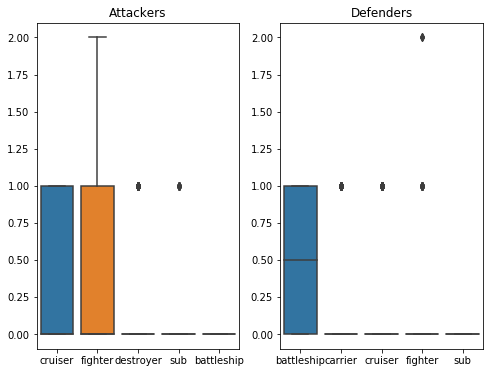

In [8]:
pearl_harbor_rev = {"cruiser" : 1, 
               "sub": 0,
               "fighter" : 2,
               "carrier" : 1,
                "battleship": 1} # DONT
pearl_harbor_rev_atk = {"battleship" : 0, 
                   "cruiser" : 1, 
                   "fighter": 2, 
                   "destroyer": 1, 
                   "sub": 2}

hi = big_picture(attacking_units = pearl_harbor_rev_atk, defending_units = pearl_harbor_rev,
                 nIter = 1000, silent = True, method = "sea")#, silent = False)

starting attacking units: {'fighter': 2, 'bomber': 0}
starting defending units: {'destroyer': 2}


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


Total Battles simulated: 1000
Probability of attacker victory: 72.5%


Attacker avg. units: {'fighter': 0.881, 'bomber': 0.0}
Defender avg. units: {'destroyer': 0.341}


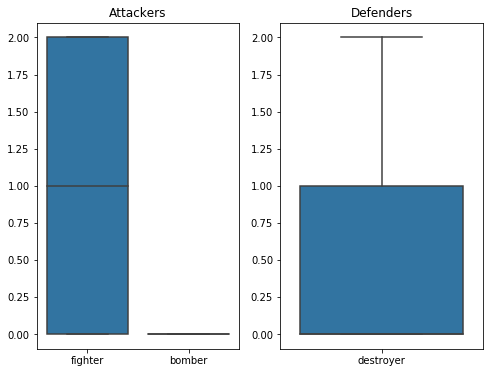

In [9]:
algeria = {"fighter" : 2, "bomber" : 0} #"infantry" : 0, "tank" : 0, "artillery" : 0, 
egypt   = {"destroyer" : 2}#{"infantry" : 3, "artillery" : 1, "tank" : 1, "fighter" : 1}

hi = big_picture(attacking_units = algeria , defending_units = egypt, nIter = 1000, method = "sea",
                 silent = True)

starting attacking units: {'infantry': 10, 'tank': 9, 'fighter': 3, 'artillery': 1}
starting defending units: {'infantry': 14, 'tank': 3, 'artillery': 1, 'fighter': 2, 'aaa': 2}


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


Total Battles simulated: 1000
Probability of attacker victory: 75.6%


Attacker avg. units: {'fighter': 2.171, 'tank': 3.589, 'artillery': 0.053, 'infantry': 0.042}
Defender avg. units: {'fighter': 0.465, 'aaa': 0.35, 'tank': 0.328, 'artillery': 0.06, 'infantry': 0.1}


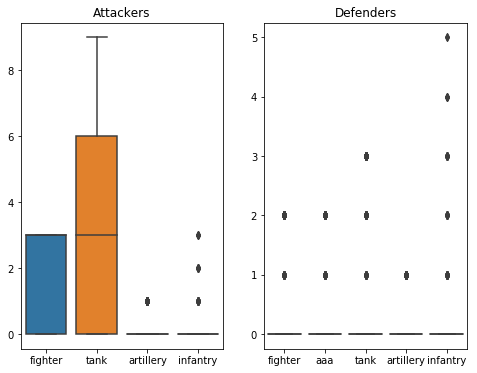

In [21]:
karelia = {"infantry" : 10, "tank" : 9, "fighter" : 3, "artillery" : 1} # DONT
moscow = {"infantry" : 14, "tank" : 3, "artillery": 1, "fighter": 2, "aaa" : 2}

hi = big_picture(attacking_units = karelia, defending_units = moscow, nIter = 1000, silent = True)#, silent = False)

starting attacking units: {'cruiser': 1, 'sub': 0, 'fighter': 1, 'carrier': 0, 'bomber': 0}
starting defending units: {'battleship': 1, 'cruiser': 0, 'fighter': 0, 'destroyer': 0, 'sub': 0}


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


Total Battles simulated: 1000
Probability of attacker victory: 62.8%


Attacker avg. units: {'cruiser': 0.332, 'fighter': 0.096, 'sub': 0.0, 'carrier': 0.0, 'bomber': 0.0}
Defender avg. units: {'battleship': 0.227, 'cruiser': 0.0, 'fighter': 0.0, 'destroyer': 0.0, 'sub': 0.0}


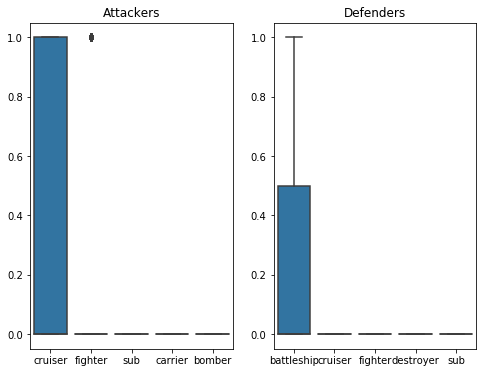

In [257]:
pearl_harbor_atk = {"cruiser" : 1, 
               "sub": 0,
               "fighter" : 1,
               "carrier" : 0,
               "bomber": 0} # DONT
pearl_harbor = {"battleship" : 1, 
                   "cruiser" : 0, 
                   "fighter": 0, 
                   "destroyer": 0, 
                   "sub": 0}

hi = big_picture(attacking_units = pearl_harbor_atk, defending_units = pearl_harbor,
                 nIter = 1000, silent = True, method = "sea")#, silent = False)

In [52]:
zero_units_check(egypt)

False

starting attacking units: {'tank': 6, 'artillery': 1, 'infantry': 9, 'fighter': 2}
starting defending units: {'fighter': 1, 'tank': 4, 'artillery': 1, 'infantry': 12}


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


Total Battles simulated: 10000
Probability of attacker victory: 36.35%


Attacker avg. units: {'tank': 0.904, 'fighter': 0.664, 'artillery': 0.022, 'infantry': 0.018}
Defender avg. units: {'fighter': 0.636, 'tank': 1.989, 'artillery': 0.307, 'infantry': 0.599}


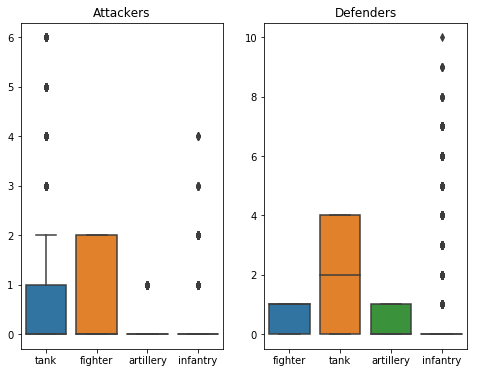

In [259]:
karelia = {"tank" : 6, "artillery": 1, "infantry" : 9, "fighter": 2}
atck_karelia = {"fighter" : 1, "tank" : 4, "artillery": 1, "infantry" : 12}

hi = big_picture(attacking_units = karelia, defending_units = atck_karelia, nIter = 10000, silent = True)#, silent = False)

starting attacking units: {'bomber': 1, 'infantry': 9, 'artillery': 3}
starting defending units: {'tank': 1, 'infantry': 3}


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


Total Battles simulated: 1000
Probability of attacker victory: 100.0%


Attacker avg. units: {'bomber': 1.0, 'infantry': 7.316, 'artillery': 3.0}
Defender avg. units: {'tank': 0.0, 'infantry': 0.0}


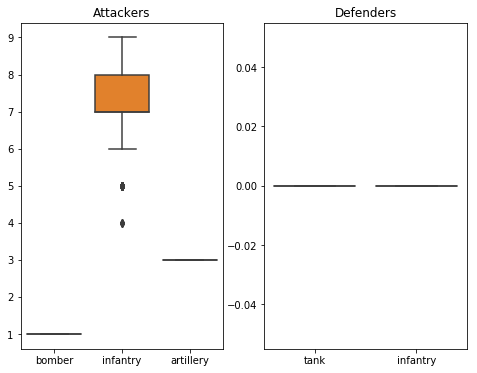

In [188]:
south_russia = {"tank" : 1, "infantry": 3}#3, "infantry" : 3, "fighter" : 1}
moscow = {"bomber" : 1, "infantry" : 9, "artillery": 3}
hi = big_picture(attacking_units = moscow, defending_units = south_russia, nIter = 1000, silent = True)#, silent = False)

starting attacking units: {'bomber': 0, 'infantry': 9, 'artillery': 3}
starting defending units: {'tank': 5, 'infantry': 1}


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


Total Battles simulated: 1000
Probability of attacker victory: 99.1%


Attacker avg. units: {'bomber': 0.0, 'infantry': 4.838, 'artillery': 2.946}
Defender avg. units: {'tank': 0.016, 'infantry': 0.0}


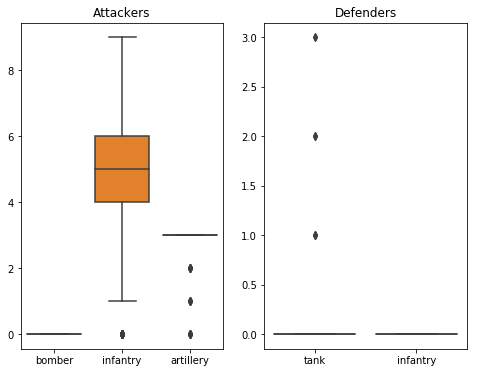

In [191]:
south_russia = {"tank" : 5, "infantry": 1}#3, "infantry" : 3, "fighter" : 1}
moscow = {"bomber" : 0, "infantry" : 9, "artillery": 3}
hi = big_picture(attacking_units = moscow, defending_units = south_russia, nIter = 1000, silent = True)#, silent = False)

starting attacking units: {'sub': 3, 'destroyer': 1, 'fighter': 1}
starting defending units: {'destroyer': 1, 'battleship': 1}


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


Total Battles simulated: 1000
Probability of attacker victory: 95.3%


Attacker avg. units: {'sub': 1.023, 'destroyer': 0.795, 'fighter': 0.894}
Defender avg. units: {'battleship': 0.027, 'destroyer': 0.002}


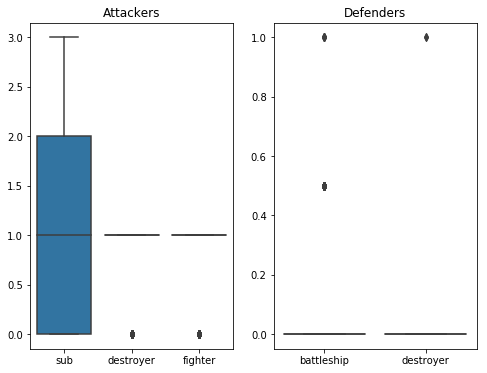

In [186]:
u_boats = {"sub" : 3, "destroyer": 1, "fighter" : 1}#3, "infantry" : 3, "fighter" : 1}
merica = {"destroyer" : 1, "battleship" : 1}
hi = big_picture(attacking_units = u_boats, defending_units = merica, nIter = 1000, silent = True, method = "sea")#, silent = False)